Download LEHD data at block group level and join with block group shapefile.

### Install / load packages

In [1]:
# pip install pygris

In [2]:
from pygris.data import get_lodes
from pygris import block_groups
from pygris import places
import pandas as pd
import geopandas as gpd

C:\Users\jpg23\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jpg23\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\jpg23\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Load LEHD data using `get_lodes` function from `pygris`

In [3]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [4]:
lehd = []

for which_state in states:
    
    try:
    
        state_lehd = get_lodes(
            state = which_state, 
            year = 2019, # data from 2019
            version = "LODES8", # uses 2020 census blocks
            lodes_type = "wac", 
            agg_level = "block group"
        )

        state_lehd["state"] = which_state

        lehd.append(state_lehd)
    
    except:
        
        pass

In [5]:
df = pd.concat(lehd)[["state", "w_geocode", "C000"]]

In [6]:
df

,state,w_geocode,C000
0,AL,010010201001,209
1,AL,010010201002,3
2,AL,010010202001,450
3,AL,010010202002,1120
4,AL,010010203001,73
...,...,...,...
451,WY,560459511001,352
452,WY,560459511002,339
453,WY,560459513001,367
454,WY,560459513002,1014


In [7]:
df.state.unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
       'WA', 'WV', 'WI', 'WY'], dtype=object)

In [8]:
df.state.nunique()

48

### Load block group shapefiles (and land area)

In [9]:
blgr = []

for which_state in states:
    
    try:
    
        state_blgr = block_groups(state = which_state, cb = True, year = 2020) # load 2020 boundaries to match LODES8 boundaries

        state_blgr["state"] = which_state

        blgr.append(state_blgr)
    
    except:
        
        pass

Using FIPS code '01' for input 'AL'
Using FIPS code '02' for input 'AK'
Using FIPS code '04' for input 'AZ'
Using FIPS code '05' for input 'AR'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '15' for input 'HI'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '19' for input 'IA'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '23' for input 'ME'
Using FIPS code '24' for input 'MD'
Using FIPS code '25' for input 'MA'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '28' for input 'MS'
Using FIPS code '29' for input 'MO'
Using FIPS code '30' for input 'MT'
Using FIPS code '31' for input 'NE'
Using FIPS code '32' for inp

In [10]:
blgr_sf = pd.concat(blgr)[["state", "GEOID", "ALAND", "geometry"]]

In [11]:
blgr_sf.head()

,state,GEOID,ALAND,geometry
0,AL,010610501003,12384479,"POLYGON ((-86.08222 31.07949, -86.08029 31.088..."
1,AL,011010026002,1140196,"POLYGON ((-86.24585 32.38357, -86.24565 32.387..."
2,AL,011010016002,1056562,"POLYGON ((-86.28608 32.37217, -86.27436 32.372..."
3,AL,011010027004,896118,"POLYGON ((-86.21981 32.37368, -86.21607 32.374..."
4,AL,010210601012,8450033,"POLYGON ((-86.64023 32.83907, -86.63698 32.839..."


In [12]:
blgr_sf.state.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [13]:
blgr_sf.state.nunique()

50

In [14]:
blgr_sanfran = blgr_sf.loc[blgr_sf.GEOID.str.contains('^06075'), :]

<AxesSubplot:>

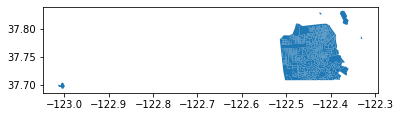

In [15]:
blgr_sanfran.plot()

### Join LEHD data and shapefile

In [16]:
df.dtypes

state        object
w_geocode    object
C000          int64
dtype: object

In [17]:
blgr_sf.dtypes

state         object
GEOID         object
ALAND          int64
geometry    geometry
dtype: object

In [18]:
df.head()

,state,w_geocode,C000
0,AL,010010201001,209
1,AL,010010201002,3
2,AL,010010202001,450
3,AL,010010202002,1120
4,AL,010010203001,73


In [19]:
blgr_sf.head()

,state,GEOID,ALAND,geometry
0,AL,010610501003,12384479,"POLYGON ((-86.08222 31.07949, -86.08029 31.088..."
1,AL,011010026002,1140196,"POLYGON ((-86.24585 32.38357, -86.24565 32.387..."
2,AL,011010016002,1056562,"POLYGON ((-86.28608 32.37217, -86.27436 32.372..."
3,AL,011010027004,896118,"POLYGON ((-86.21981 32.37368, -86.21607 32.374..."
4,AL,010210601012,8450033,"POLYGON ((-86.64023 32.83907, -86.63698 32.839..."


In [20]:
df.shape[0]

231943

In [21]:
blgr_sf.shape[0]

238809

In [22]:
df[df['state'] == 'AR']

,state,w_geocode,C000
0,AR,050350306021,8
1,AR,050350306023,20


In [23]:
blgr_sf[blgr_sf['state'] == 'AR'].head()

,state,GEOID,ALAND,geometry
0,AR,050479502021,8197836,"POLYGON ((-93.86539 35.51769, -93.86497 35.521..."
1,AR,050119505001,129982850,"POLYGON ((-92.22441 33.39361, -92.22177 33.396..."
2,AR,050690025001,241120926,"POLYGON ((-92.01678 34.25317, -92.01553 34.254..."
3,AR,051219603011,11894503,"POLYGON ((-91.02881 36.30596, -91.02698 36.308..."
4,AR,051239601003,410879769,"POLYGON ((-90.71867 35.01431, -90.71778 35.015..."


In [24]:
final_df = blgr_sf.merge(df, how = 'left', left_on = ['state', 'GEOID'], right_on = ['state', 'w_geocode']).drop(columns = ['w_geocode']).rename(columns={"C000": "total_jobs", "ALAND": "land_area", "GEOID": "block_group"})

In [25]:
final_df.shape[0]

238809

In [26]:
final_df.head()

,state,block_group,land_area,geometry,total_jobs
0,AL,010610501003,12384479,"POLYGON ((-86.08222 31.07949, -86.08029 31.088...",246.0
1,AL,011010026002,1140196,"POLYGON ((-86.24585 32.38357, -86.24565 32.387...",711.0
2,AL,011010016002,1056562,"POLYGON ((-86.28608 32.37217, -86.27436 32.372...",1395.0
3,AL,011010027004,896118,"POLYGON ((-86.21981 32.37368, -86.21607 32.374...",415.0
4,AL,010210601012,8450033,"POLYGON ((-86.64023 32.83907, -86.63698 32.839...",208.0


In [27]:
final_df.state.nunique()

50

In [28]:
df_states = df.state.unique().tolist()
final_df_states = final_df.state.unique().tolist()

list(set(df_states).difference(final_df_states))

[]

In [29]:
type(final_df)

geopandas.geodataframe.GeoDataFrame

### Subset to cities of interest

In [30]:
city_list = [
  'Albuquerque NM',
  'Atlanta GA',
  'Austin TX',
  'Bakersfield CA',
  'Baltimore MD',
  'Boston MA',
  'Charlotte NC',
  'Chicago IL',
  'Cincinnati OH',
  'Cleveland OH',
  'Colorado Springs CO',
  'Columbus OH',
  'Dallas TX',
  'Denver CO',
  'Detroit MI',
  'El Paso TX',
  'Fort Worth TX',
  'Fresno CA',
  'Urban Honolulu HI',
  'Houston TX',
  'Indianapolis city (balance) IN',
  'Jacksonville FL',
  'Kansas City MO',
  'Las Vegas NV',
  'Los Angeles CA',
  'Louisville KY',
  'Memphis TN',
  'Miami FL',
  'Milwaukee WI',
  'Minneapolis MN',
  'Nashville-Davidson metropolitan government (balance) TN',
  'New Orleans LA',
  'New York NY',
  'Oakland CA',
  'Oklahoma City OK',
  'Omaha NE',
  'Orlando FL',
  'Philadelphia PA',
  'Phoenix AZ',
  'Pittsburgh PA',
  'Portland OR',
  'Raleigh NC',
  'Sacramento CA',
  'Salt Lake City UT',
  'San Antonio TX',
  'San Diego CA',
  'San Francisco CA',
  'San Jose CA',
  'Seattle WA',
  'St. Louis MO',
  'Tampa FL',
  'Tucson AZ',
  'Tulsa OK',
  'Washington DC']

In [31]:
all_places = places(cb = True)

Using the default year of 2021
Retrieving Census-designated places for the entire United States


In [32]:
all_places.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,12,35000,02404783,1600000US1235000,1235000,Jacksonville,Jacksonville city,FL,Florida,25,1935492088,329347337,"POLYGON ((-82.04933 30.27334, -82.04924 30.273..."
1,01,32416,02403774,1600000US0132416,0132416,Guntersville,Guntersville city,AL,Alabama,25,66393352,44192114,"MULTIPOLYGON (((-86.24300 34.36247, -86.23766 ..."
2,01,81504,02406871,1600000US0181504,0181504,Westover,Westover town,AL,Alabama,43,51094431,382665,"MULTIPOLYGON (((-86.54358 33.35226, -86.54074 ..."
3,01,26896,02403619,1600000US0126896,0126896,Florence,Florence city,AL,Alabama,25,68681105,546506,"POLYGON ((-87.72248 34.81723, -87.71904 34.821..."
4,20,47350,00485624,1600000US2047350,2047350,Mission Hills,Mission Hills city,KS,Kansas,25,5276389,2474,"POLYGON ((-94.63043 39.00964, -94.63043 39.015..."


In [33]:
pd.set_option('display.max_colwidth', None)
all_places.loc[all_places.NAME.str.contains('Nashville|Indianapolis|Honolulu|St\.? Louis'), :][['NAME', 'STUSPS']]

,NAME,STUSPS
868,Nashville,OH
1075,Nashville-Davidson metropolitan government (balance),TN
5468,Nashville,KS
7767,Indianapolis city (balance),IN
7907,St. Louisville,OH
10770,Nashville,GA
11519,Nashville,MI
11684,St. Louis,OK
13505,Nashville,IN
13872,Urban Honolulu,HI


In [34]:
all_places['city'] = all_places.apply(lambda x: '{} {}'.format(x['NAME'], x['STUSPS']), axis=1)

In [35]:
all_places.city.head()

0     Jacksonville FL
1     Guntersville AL
2         Westover AL
3         Florence AL
4    Mission Hills KS
Name: city, dtype: object

In [36]:
all_places_simp = all_places[['city', 'geometry']]
the_places = all_places_simp[all_places_simp['city'].isin(city_list)]

In [37]:
pd.reset_option('^display.', silent=True)
the_places.head()

,city,geometry
0,Jacksonville FL,"POLYGON ((-82.04933 30.27334, -82.04924 30.273..."
120,Oklahoma City OK,"POLYGON ((-97.83367 35.33536, -97.83119 35.335..."
192,San Diego CA,"MULTIPOLYGON (((-116.93264 32.64913, -116.9319..."
567,Oakland CA,"POLYGON ((-122.34225 37.80556, -122.33412 37.8..."
761,Tucson AZ,"POLYGON ((-111.05873 32.20679, -111.05446 32.2..."


In [38]:
the_places.city.unique()

array(['Jacksonville FL', 'Oklahoma City OK', 'San Diego CA',
       'Oakland CA', 'Tucson AZ', 'Louisville KY',
       'Nashville-Davidson metropolitan government (balance) TN',
       'Memphis TN', 'Sacramento CA', 'Fort Worth TX', 'Portland OR',
       'Chicago IL', 'Colorado Springs CO', 'Denver CO', 'New Orleans LA',
       'Detroit MI', 'Philadelphia PA', 'Tulsa OK', 'Cleveland OH',
       'Dallas TX', 'El Paso TX', 'Omaha NE', 'Washington DC',
       'Bakersfield CA', 'Tampa FL', 'Milwaukee WI', 'Los Angeles CA',
       'Seattle WA', 'Indianapolis city (balance) IN', 'Pittsburgh PA',
       'Albuquerque NM', 'Boston MA', 'New York NY', 'Atlanta GA',
       'San Jose CA', 'Columbus OH', 'Miami FL', 'Minneapolis MN',
       'Salt Lake City UT', 'Orlando FL', 'Urban Honolulu HI',
       'St. Louis MO', 'Houston TX', 'Fresno CA', 'Las Vegas NV',
       'Cincinnati OH', 'San Francisco CA', 'San Antonio TX',
       'Baltimore MD', 'Phoenix AZ', 'Kansas City MO', 'Charlotte NC',
      

In [39]:
the_places.city.nunique()

54

In [40]:
in_places = the_places.city.unique().tolist()

list(set(city_list).difference(in_places))

[]

In [41]:
final_df.crs == the_places.crs

True

In [42]:
df_joined = gpd.sjoin(final_df, the_places, how = "inner").drop(columns = ['index_right'])

In [43]:
df_joined.head()

,state,block_group,land_area,geometry,total_jobs,city
4434,AZ,040131037021,603072,"POLYGON ((-112.05651 33.58952, -112.05212 33.5...",741.0,Phoenix AZ
4435,AZ,040131047012,263094,"POLYGON ((-112.06514 33.58041, -112.06510 33.5...",490.0,Phoenix AZ
4440,AZ,040131091012,507883,"POLYGON ((-112.12558 33.50640, -112.12380 33.5...",83.0,Phoenix AZ
4447,AZ,040131136021,427255,"POLYGON ((-112.01291 33.45857, -112.01285 33.4...",80.0,Phoenix AZ
4452,AZ,040131072011,853700,"POLYGON ((-112.13423 33.51673, -112.12559 33.5...",9581.0,Phoenix AZ


In [44]:
sf_test = df_joined[df_joined['city']=='San Francisco CA']

<AxesSubplot:>

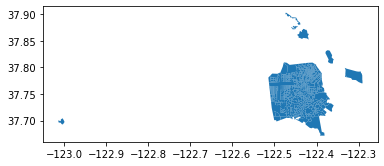

In [45]:
sf_test.plot()

In [46]:
sf_test2 = final_df.loc[final_df.block_group.str.contains('^06075'), :]

<AxesSubplot:>

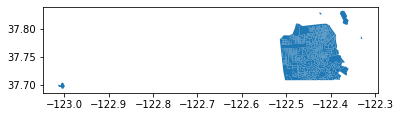

In [47]:
sf_test2.plot()

In [48]:
df_joined['jobs_per_sq_meter'] = df_joined['total_jobs']/df_joined['land_area']

In [49]:
df_joined.head()

,state,block_group,land_area,geometry,total_jobs,city,jobs_per_sq_meter
4434,AZ,040131037021,603072,"POLYGON ((-112.05651 33.58952, -112.05212 33.5...",741.0,Phoenix AZ,0.001229
4435,AZ,040131047012,263094,"POLYGON ((-112.06514 33.58041, -112.06510 33.5...",490.0,Phoenix AZ,0.001862
4440,AZ,040131091012,507883,"POLYGON ((-112.12558 33.50640, -112.12380 33.5...",83.0,Phoenix AZ,0.000163
4447,AZ,040131136021,427255,"POLYGON ((-112.01291 33.45857, -112.01285 33.4...",80.0,Phoenix AZ,0.000187
4452,AZ,040131072011,853700,"POLYGON ((-112.13423 33.51673, -112.12559 33.5...",9581.0,Phoenix AZ,0.011223


In [50]:
df_joined.land_area.mean()

1842155.911821101

In [52]:
sanfran_chor = df_joined[df_joined['city']=='San Francisco CA']
sanfran_chor.head()

,state,block_group,land_area,geometry,total_jobs,city,jobs_per_sq_meter
11520,CA,060750156003,136885,"POLYGON ((-122.45888 37.78133, -122.45630 37.7...",719.0,San Francisco CA,0.005253
11521,CA,060750169001,140759,"POLYGON ((-122.43579 37.76906, -122.43357 37.7...",630.0,San Francisco CA,0.004476
11611,CA,060750153001,109964,"POLYGON ((-122.44049 37.78806, -122.43877 37.7...",566.0,San Francisco CA,0.005147
11618,CA,060750217001,735089,"POLYGON ((-122.45084 37.74590, -122.44936 37.7...",536.0,San Francisco CA,0.000729
11656,CA,060750260012,99140,"POLYGON ((-122.43398 37.72576, -122.43362 37.7...",176.0,San Francisco CA,0.001775


In [53]:
sanfran_chor.explore(
    column="total_jobs",
    tooltip="total_jobs",
    tiles="CartoDB positron",
    style_kwds=dict(alpha=.5)
)

### Export as geodataframe

In [51]:
df_joined.to_file("C:/Users/jpg23/data/downtownrecovery/lehd_new_downtowns/cities_lehd_jobs_blockgroup.geojson", driver="GeoJSON")  